<a href="https://colab.research.google.com/github/evansemet/Cracking-The-Cryptic-Solutions/blob/main/How_Do_You_Even_Start_This_Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install z3-solver
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from z3 import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def printBoard(board):
  x = np.ones((3,3))
  groups = np.block([[x*0,x*1,x*2], [x*3,x*4,x*5], [x*6,x*7,x*8]])
  fig, ax = plt.subplots(1, 1, figsize=(3, 3))
  x = np.array(board.astype('int').astype('str'))
  x[x == "0"] = "-"
  ax = sns.heatmap(groups, annot=x, cbar=False, cmap="tab20", fmt="", vmin=0, vmax=19, linewidths=1, annot_kws={"size":10})
  ax.axis("off")    
  plt.tight_layout()
  plt.show()

Solving...
Solved in 13.04356837272644 seconds.


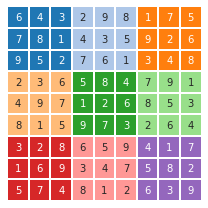

In [ ]:
print("Solving...")
start = time.time()
board = np.zeros((9, 9))
X = np.array(IntVector('x', 9**2), dtype=object).reshape(9, 9)
s = Tactic("qffd").solver()

# normal sudoku
s += [And(i > 0, i < 10) for i in X.ravel()]
s += [Distinct(list(X[i, :])) for i in range(9)]
s += [Distinct(list(X[:, i])) for i in range(9)]
x = np.ones((3,3))
groups = np.block([[x*0,x*1,x*2], [x*3,x*4,x*5], [x*6,x*7,x*8]])
s += [Distinct(list(X[groups == i].ravel())) for i in range(9)]

# add in rules
s += And(X[5,2] + X[6,2] == 13, X[5,5] + X[6,5] == 12, X[5,8] + X[6,8] == 11)

def circle(r,c):
  p1 = X[r,c]; p2 = X[r,c+1]; p3 = X[r+1,c]; p4 = X[r+1,c+1]
  return Or(p1+p2+p3==p4, p1+p2+p4==p3, p1+p3+p4==p2, p2+p3+p4==p1)
s += And(circle(0,1), circle(0,3), circle(1,5), circle(3,0), circle(3,3), circle(3,7), circle(6,0), circle(7,3))

# only need to do diagonal king moves because other rules cover orthagonal king moves
king_moves = [(1,1), (1,-1), (-1,1), (-1,-1)]
for (r,c),e in np.ndenumerate(X):
  for a,b in king_moves:
    if r+a>=0 and r+a<9 and c+b>=0 and c+b<9:
      s += e != X[r+a,c+b]

if s.check() == sat:
  m = s.model()
  eval = np.vectorize(lambda x : m.evaluate(x))
  boardTemp = eval(X)
  print(f"Solved in {time.time() - start} seconds.")
  for (r, c), e in np.ndenumerate(boardTemp):
    board[r][c] = str(e)
  printBoard(board)
else:
  print(f"Failed in {time.time() - start} seconds.")